
# "Polish companies bankruptcy" dataset processing

- Dataset source: https://archive.ics.uci.edu/dataset/365/polish+companies+bankruptcy+data


## Dataset Analysys 

In [2]:
from pandas import DataFrame
from ucimlrepo import fetch_ucirepo
from typing import NamedTuple, List, Dict, Any
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display


# Type definitions from:
# https://github.com/uci-ml-repo/ucimlrepo?tab=readme-ov-file#parameters
class UciMlData(NamedTuple):
    ids: DataFrame
    features: DataFrame
    targets: DataFrame
    original: DataFrame
    headers: List[str]


class UciMlDataset(NamedTuple):
    data: UciMlData
    metadata: Dict[str, Any]
    variables: DataFrame

In [3]:
# Dataset: Polish companies bankruptcy
# Source: https://archive.ics.uci.edu/dataset/365/polish+companies+bankruptcy+data

polish_companies_bankruptcy: UciMlDataset = fetch_ucirepo(id=365)

X_all = polish_companies_bankruptcy.data.features
y_all = polish_companies_bankruptcy.data.targets

In [4]:
display(X_all.head())
display(y_all.head())
display(pd.DataFrame(X_all.dtypes).T)

print("Number of features: ", X_all.shape[1])
print("Number of samples: ", X_all.shape[0])
print("Feature types: ", X_all.dtypes.unique())

,year,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A55,A56,A57,A58,A59,A60,A61,A62,A63,A64
0,1,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,...,348690.0,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277
1,1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,...,2304.6,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870
2,1,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,...,6332.7,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078
3,1,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,...,20545.0,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497
4,1,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,...,3186.6,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980


,class
0,0
1,0
2,0
3,0
4,0


,year,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A55,A56,A57,A58,A59,A60,A61,A62,A63,A64
0,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64


Number of features:  65
Number of samples:  43405
Feature types:  [dtype('int64') dtype('float64')]


In [68]:
# additional feature information
feature_description = pd.DataFrame(
    [
        ["A1", "net profit / total assets"],
        ["A2", "total liabilities / total assets"],
        ["A3", "working capital / total assets"],
        ["A4", "current assets / short-term liabilities"],
        [
            "A5",
            "[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365",
        ],
        ["A6", "retained earnings / total assets"],
        ["A7", "EBIT / total assets"],
        ["A8", "book value of equity / total liabilities"],
        ["A9", "sales / total assets"],
        ["A10", "equity / total assets"],
        [
            "A11",
            "(gross profit + extraordinary items + financial expenses) / total assets",
        ],
        ["A12", "gross profit / short-term liabilities"],
        ["A13", "(gross profit + depreciation) / sales"],
        ["A14", "(gross profit + interest) / total assets"],
        ["A15", "(total liabilities * 365) / (gross profit + depreciation)"],
        ["A16", "(gross profit + depreciation) / total liabilities"],
        ["A17", "total assets / total liabilities"],
        ["A18", "gross profit / total assets"],
        ["A19", "gross profit / sales"],
        ["A20", "(inventory * 365) / sales"],
        ["A21", "sales (n) / sales (n-1)"],
        ["A22", "profit on operating activities / total assets"],
        ["A23", "net profit / sales"],
        ["A24", "gross profit (in 3 years) / total assets"],
        ["A25", "(equity - share capital) / total assets"],
        ["A26", "(net profit + depreciation) / total liabilities"],
        ["A27", "profit on operating activities / financial expenses"],
        ["A28", "working capital / fixed assets"],
        ["A29", "logarithm of total assets"],
        ["A30", "(total liabilities - cash) / sales"],
        ["A31", "(gross profit + interest) / sales"],
        ["A32", "(current liabilities * 365) / cost of products sold"],
        ["A33", "operating expenses / short-term liabilities"],
        ["A34", "operating expenses / total liabilities"],
        ["A35", "profit on sales / total assets"],
        ["A36", "total sales / total assets"],
        ["A37", "(current assets - inventories) / long-term liabilities"],
        ["A38", "constant capital / total assets"],
        ["A39", "profit on sales / sales"],
        ["A40", "(current assets - inventory - receivables) / short-term liabilities"],
        [
            "A41",
            "total liabilities / ((profit on operating activities + depreciation) * (12/365))",
        ],
        ["A42", "profit on operating activities / sales"],
        ["A43", "rotation receivables + inventory turnover in days"],
        ["A44", "(receivables * 365) / sales"],
        ["A45", "net profit / inventory"],
        ["A46", "(current assets - inventory) / short-term liabilities"],
        ["A47", "(inventory * 365) / cost of products sold"],
        [
            "A48",
            "EBITDA (profit on operating activities - depreciation) / total assets",
        ],
        ["A49", "EBITDA (profit on operating activities - depreciation) / sales"],
        ["A50", "current assets / total liabilities"],
        ["A51", "short-term liabilities / total assets"],
        ["A52", "(short-term liabilities * 365) / cost of products sold)"],
        ["A53", "equity / fixed assets"],
        ["A54", "constant capital / fixed assets"],
        ["A55", "working capital"],
        ["A56", "(sales - cost of products sold) / sales"],
        [
            "A57",
            "(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation)",
        ],
        ["A58", "total costs /total sales"],
        ["A59", "long-term liabilities / equity"],
        ["A60", "sales / inventory"],
        ["A61", "sales / receivables"],
        ["A62", "(short-term liabilities *365) / sales"],
        ["A63", "sales / short-term liabilities"],
        ["A64", "sales / fixed assets"],
    ],
    columns=["Feature", "Description"],
)

feature_description.set_index("Feature", inplace=True)
feature_description.index.name = None

display(feature_description)

,Description
A1,net profit / total assets
A2,total liabilities / total assets
A3,working capital / total assets
A4,current assets / short-term liabilities
A5,[(cash + short-term securities + receivables -...
...,...
A60,sales / inventory
A61,sales / receivables
A62,(short-term liabilities *365) / sales
A63,sales / short-term liabilities


## Visualizing the data

In [74]:
# Analyzing each year sample count and missing feature count
year_counts = X_all["year"].value_counts().sort_index()
year_counts_df = year_counts.reset_index()
year_counts_df.columns = ["Year", "Number of Rows"]

missing_counts = []

for year in year_counts_df["Year"]:
    year_data = X_all[X_all["year"] == year]
    missing_counts.append(year_data.isnull().any(axis=1).sum())

year_counts_df["Number of Rows with Missing Features"] = missing_counts

year_counts_df["% of Rows with Missing Features"] = (
    year_counts_df["Number of Rows with Missing Features"]
    / year_counts_df["Number of Rows"]
) * 100

year_counts_df

,Year,Number of Rows,Number of Rows with Missing Features,% of Rows with Missing Features
0,1,7027,3833,54.546748
1,2,10173,6085,59.815197
2,3,10503,5618,53.489479
3,4,9792,5023,51.296977
4,5,5910,2879,48.714044


In [122]:
# Choose only samples from year = 1
# and remove the year column

year = 3
filter_idx = X_all["year"] == year

X = X_all[filter_idx].drop(columns=["year"])
y = y_all[filter_idx]

display(X.head())
display(y.head())

print("Number of features: ", X.shape[1])
print("Number of samples: ", X.shape[0])
print("Feature types: ", X.dtypes.unique())
print("Target types: ", y.dtypes.unique())

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A55,A56,A57,A58,A59,A60,A61,A62,A63,A64
17200,0.174190,0.41299,0.14371,1.3480,-28.9820,0.60383,0.219460,1.1225,1.1961,0.46359,...,127000.0,0.163960,0.375740,0.83604,0.000007,9.7145,6.2813,84.291,4.3303,4.0341
17201,0.146240,0.46038,0.28230,1.6294,2.5952,0.00000,0.171850,1.1721,1.6018,0.53962,...,3387.8,0.027516,0.271000,0.90108,0.000000,5.9882,4.1103,102.190,3.5716,5.9500
17202,0.000595,0.22612,0.48839,3.1599,84.8740,0.19114,0.004572,2.9881,1.0077,0.67566,...,20453.0,0.007639,0.000881,0.99236,0.000000,6.7742,3.7922,64.846,5.6287,4.4581
17203,0.024526,0.43236,0.27546,1.7833,-10.1050,0.56944,0.024526,1.3057,1.0509,0.56453,...,5012.6,0.048398,0.043445,0.95160,0.142980,4.2286,5.0528,98.783,3.6950,3.4844
17204,0.188290,0.41504,0.34231,1.9279,-58.2740,0.00000,0.233580,1.4094,1.3393,0.58496,...,13730.0,0.176480,0.321880,0.82635,0.073039,2.5912,7.0756,100.540,3.6303,4.6375


,class
17200,0
17201,0
17202,0
17203,0
17204,0


Number of features:  64
Number of samples:  10503
Feature types:  [dtype('float64')]
Target types:  [dtype('int64')]


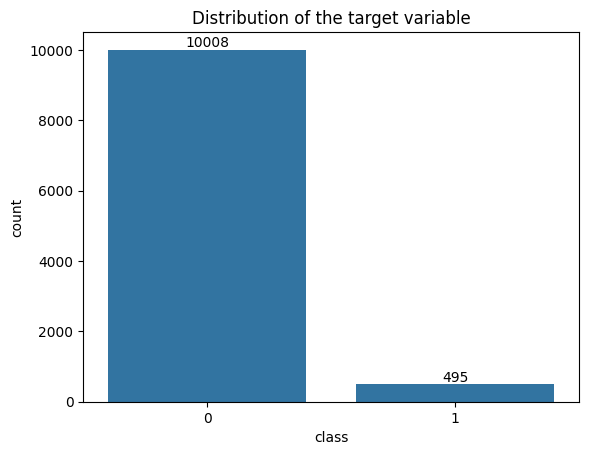

1 - Bankrupt, 0 - Not bankrupt


In [81]:
# Distribution of the target variable
ax = sns.countplot(x=y.columns[0], data=y)
plt.title("Distribution of the target variable")
abs_values = y["class"].value_counts().values
ax.bar_label(ax.containers[0], labels=abs_values, label_type="edge")
plt.show()
print("1 - Bankrupt, 0 - Not bankrupt")

In [82]:
# Summary statistics of the features
min_values = np.min(X, axis=0)
max_values = np.max(X, axis=0)
ranges = max_values - min_values
variances = np.var(X, axis=0)
mean_values = np.mean(X, axis=0)

df = pd.DataFrame(
    {
        "Min Value": min_values,
        "Max Value": max_values,
        "Range": ranges,
        "Variance": variances,
        "Mean": mean_values,
    }
)

display(df)
print(df)

,Min Value,Max Value,Range,Variance,Mean
A1,-1.769200e+01,52.652,7.034400e+01,4.196008e-01,0.052844
A2,0.000000e+00,480.730,4.807300e+02,4.130293e+01,0.619911
A3,-4.797300e+02,17.708,4.974380e+02,4.121320e+01,0.095490
A4,2.080200e-03,53433.000,5.343300e+04,2.742271e+05,9.980499
A5,-1.190000e+07,685000.000,1.258500e+07,1.405316e+10,-1347.355061
...,...,...,...,...,...
A60,0.000000e+00,3660000.000,3.660000e+06,1.380590e+09,571.395839
A61,-6.590300e+00,4470.400,4.476990e+03,7.005709e+03,13.935361
A62,-2.340000e+06,1070000.000,3.410000e+06,6.763327e+08,134.866817
A63,-1.562200e-04,1974.500,1.974500e+03,9.870655e+02,9.095149


        Min Value    Max Value         Range      Variance         Mean
A1  -1.769200e+01       52.652  7.034400e+01  4.196008e-01     0.052844
A2   0.000000e+00      480.730  4.807300e+02  4.130293e+01     0.619911
A3  -4.797300e+02       17.708  4.974380e+02  4.121320e+01     0.095490
A4   2.080200e-03    53433.000  5.343300e+04  2.742271e+05     9.980499
A5  -1.190000e+07   685000.000  1.258500e+07  1.405316e+10 -1347.355061
..            ...          ...           ...           ...          ...
A60  0.000000e+00  3660000.000  3.660000e+06  1.380590e+09   571.395839
A61 -6.590300e+00     4470.400  4.476990e+03  7.005709e+03    13.935361
A62 -2.340000e+06  1070000.000  3.410000e+06  6.763327e+08   134.866817
A63 -1.562200e-04     1974.500  1.974500e+03  9.870655e+02     9.095149
A64 -1.023000e-04    21499.000  2.149900e+04  1.834216e+05    35.766800

[64 rows x 5 columns]


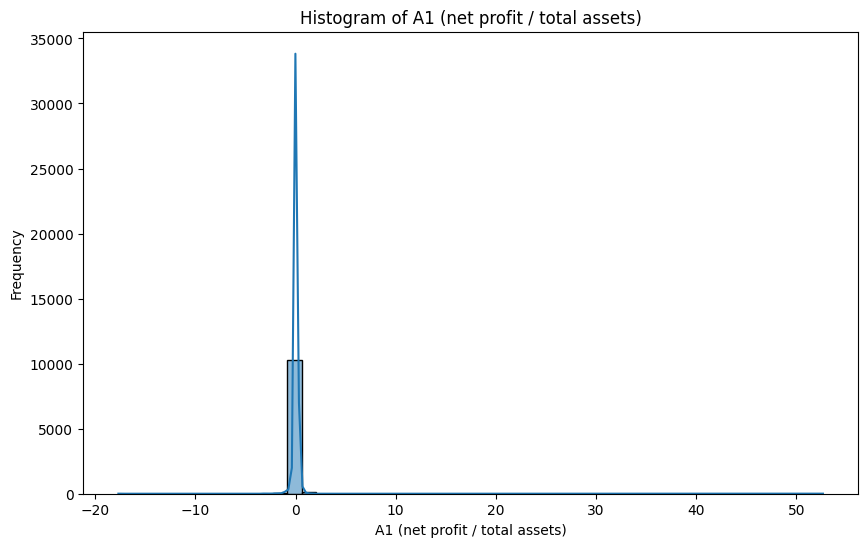

In [83]:
# Histogram of the feature A1
feature_name = "A1"
feature_desc = feature_description["Description"][feature_name]

data = X[feature_name]
plt.figure(figsize=(10, 6))
sns.histplot(data, bins=50, kde=True)
plt.title(f"Histogram of {feature_name} ({feature_desc})")
plt.xlabel(f"{feature_name} ({feature_desc})")
plt.ylabel("Frequency")

plt.show()

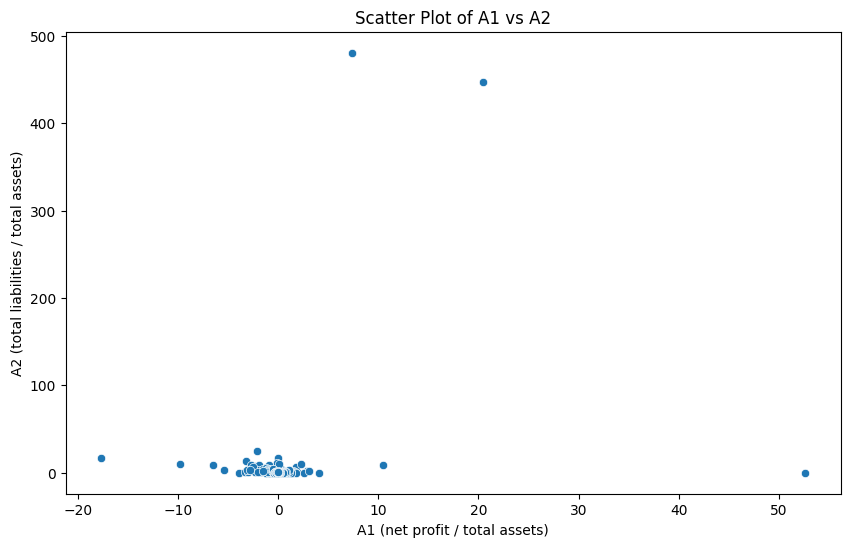

In [84]:
# Assuming X is your DataFrame containing the features
# Ensure 'A1' and 'A2' are in your DataFrame
plt.figure(figsize=(10, 6))
sns.scatterplot(x="A1", y="A2", data=X)

plt.title("Scatter Plot of A1 vs A2")
plt.xlabel(f"A1 ({feature_description['Description']['A1']})")
plt.ylabel(f"A2 ({feature_description['Description']['A2']})")

plt.show()

## Data Preprocessing

In [85]:
display(X.describe())

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A55,A56,A57,A58,A59,A60,A61,A62,A63,A64
count,10503.000000,10503.000000,10503.000000,10485.000000,1.047800e+04,10503.000000,10503.000000,10489.000000,10500.000000,10503.000000,...,1.050300e+04,10460.000000,10503.000000,10474.000000,10503.000000,9.911000e+03,10486.000000,1.046000e+04,10485.000000,10275.000000
mean,0.052844,0.619911,0.095490,9.980499,-1.347355e+03,-0.121159,0.065624,19.140113,1.819254,0.366093,...,6.638015e+03,-0.530082,-0.014817,3.848794,1.429319,5.713958e+02,13.935361,1.348668e+02,9.095149,35.766800
std,0.647797,6.427041,6.420056,523.691951,1.185517e+05,6.970625,0.651152,717.756745,7.581659,6.428603,...,5.986270e+04,55.978608,18.684047,190.201224,77.273270,3.715816e+04,83.704103,2.600764e+04,31.419096,428.298315
min,-17.692000,0.000000,-479.730000,0.002080,-1.190000e+07,-508.120000,-17.692000,-2.081800,-1.215700,-479.730000,...,-7.510000e+05,-5691.700000,-1667.300000,-198.690000,-172.070000,0.000000e+00,-6.590300,-2.340000e+06,-0.000156,-0.000102
25%,0.000686,0.253955,0.017461,1.040100,-5.207075e+01,0.000000,0.002118,0.431270,1.011275,0.297340,...,1.462100e+01,0.005137,0.006796,0.875560,0.000000,5.533150e+00,4.486075,4.073700e+01,3.062800,2.023350
50%,0.043034,0.464140,0.198560,1.605600,1.579300e+00,0.000000,0.050945,1.111000,1.199000,0.515500,...,8.822900e+02,0.051765,0.106880,0.953060,0.002976,9.952100e+00,6.677300,7.066400e+01,5.139200,4.059300
75%,0.123805,0.689330,0.419545,2.959500,5.608400e+01,0.072584,0.142275,2.857100,2.059100,0.725635,...,4.348900e+03,0.130010,0.271310,0.995927,0.240320,2.093600e+01,10.587500,1.182200e+02,8.882600,9.682750
max,52.652000,480.730000,17.708000,53433.000000,6.850000e+05,45.533000,52.652000,53432.000000,740.440000,11.837000,...,3.380000e+06,293.150000,552.640000,18118.000000,7617.300000,3.660000e+06,4470.400000,1.070000e+06,1974.500000,21499.000000


## Missing values

Number of features with missing values:  44


,3,4,7,8,11,12,14,15,16,18,...,51,52,53,55,57,59,60,61,62,63
Feature,A4,A5,A8,A9,A12,A13,A15,A16,A17,A19,...,A52,A53,A54,A56,A58,A60,A61,A62,A63,A64
Missing Values,18,25,14,3,18,43,8,14,14,43,...,86,228,228,43,29,592,17,43,18,228


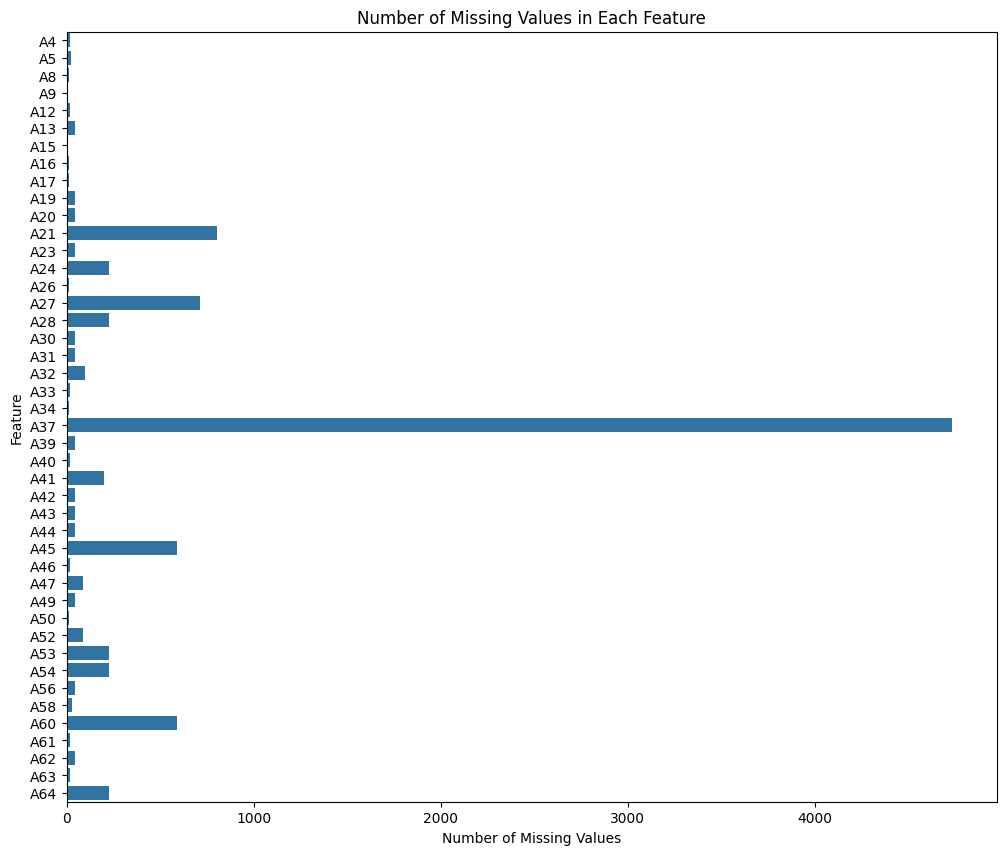

A37 desc: (current assets - inventories) / long-term liabilities
Number of missing values: 9888
Number of rows with missing values: 5618


In [127]:
missing_values = X.isnull().sum().reset_index()
missing_values = missing_values[missing_values[0] > 0]
missing_values.columns = ["Feature", "Missing Values"]

print("Number of features with missing values: ", missing_values.shape[0])
display(missing_values.T)

plt.figure(figsize=(12, 10))
sns.barplot(x="Missing Values", y="Feature", data=missing_values)
plt.title("Number of Missing Values in Each Feature")
plt.xlabel("Number of Missing Values")
plt.ylabel("Feature")
plt.show()

print(f"A37 desc: {feature_description['Description']['A37']}")

number_of_missing_values = sum(missing_values["Missing Values"].values)
print(f"Number of missing values: {number_of_missing_values}")
number_of_rows_with_missing_values = X.isnull().any(axis=1).sum()
print(f"Number of rows with missing values: {number_of_rows_with_missing_values}")

In [128]:
# drop column A37
print("Drop column A37")
X_clean = X.drop(columns=["A37"])

number_of_rows_with_missing_values_after_removal = X_clean.isnull().any(axis=1).sum()
print(
    f"Number of missing values after removal: {number_of_rows_with_missing_values_after_removal}"
)

# drop rest of samples with missing values
X_clean = X_clean.dropna()
y_clean = y.loc[X_clean.index]

sample_count = pd.DataFrame(
    {
        "Number of samples before removal": [X.shape[0]],
        "Number of samples after removal": [X_clean.shape[0]],
    }
)
display(sample_count)

Drop column A37
Number of missing values after removal: 2269


,Number of samples before removal,Number of samples after removal
0,10503,8234
